# Covid-19 Predictive Modelling

In [79]:
# import libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [80]:
# Read each CSV file
df1 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\country_wise_latest.csv')
df2 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\covid_19_clean_complete.csv')
df3 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\day_wise.csv')
df4 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\full_grouped.csv')
df5 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\usa_county_wise.csv')
df6 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\worldometer_data.csv')

# Concatenate all DataFrames into one
# merged_df = pd.concat([df1, df2, df3, df4,df5,df6], ignore_index=True)
# merged_df

In [81]:
df2 = pd.read_csv(r'C:\Users\USER\Desktop\Tedprime\3mtt\covid_19_clean_complete.csv')
print("Original Data:")
print(df2)

Original Data:
      Province/State         Country/Region        Lat       Long        Date  \
0                NaN            Afghanistan  33.939110  67.709953  22/01/2020   
1                NaN                Albania  41.153300  20.168300  22/01/2020   
2                NaN                Algeria  28.033900   1.659600  22/01/2020   
3                NaN                Andorra  42.506300   1.521800  22/01/2020   
4                NaN                 Angola -11.202700  17.873900  22/01/2020   
...              ...                    ...        ...        ...         ...   
49063            NaN  Sao Tome and Principe   0.186400   6.613100  27/07/2020   
49064            NaN                  Yemen  15.552727  48.516388  27/07/2020   
49065            NaN                Comoros -11.645500  43.333300  27/07/2020   
49066            NaN             Tajikistan  38.861000  71.276100  27/07/2020   
49067            NaN                Lesotho -29.610000  28.233600  27/07/2020   

       Confi

In [82]:
df2.isna().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [83]:
covid = df2.drop(['Province/State'], axis = 1)
covid

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,22/01/2020,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,22/01/2020,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,22/01/2020,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,22/01/2020,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,22/01/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,27/07/2020,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,27/07/2020,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,27/07/2020,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,27/07/2020,7235,60,6028,1147,Europe


In [84]:
covid.isna().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [85]:
data_dummy = covid.copy()
data_dummy

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.939110,67.709953,22/01/2020,0,0,0,0,Eastern Mediterranean
1,Albania,41.153300,20.168300,22/01/2020,0,0,0,0,Europe
2,Algeria,28.033900,1.659600,22/01/2020,0,0,0,0,Africa
3,Andorra,42.506300,1.521800,22/01/2020,0,0,0,0,Europe
4,Angola,-11.202700,17.873900,22/01/2020,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,27/07/2020,865,14,734,117,Africa
49064,Yemen,15.552727,48.516388,27/07/2020,1691,483,833,375,Eastern Mediterranean
49065,Comoros,-11.645500,43.333300,27/07/2020,354,7,328,19,Africa
49066,Tajikistan,38.861000,71.276100,27/07/2020,7235,60,6028,1147,Europe


In [86]:
one_hot_encoded_data_dummy = pd.get_dummies(data_dummy, columns=['WHO Region'])
one_hot_encoded_data_dummy

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,33.939110,67.709953,22/01/2020,0,0,0,0,0,0,1,0,0,0
1,Albania,41.153300,20.168300,22/01/2020,0,0,0,0,0,0,0,1,0,0
2,Algeria,28.033900,1.659600,22/01/2020,0,0,0,0,1,0,0,0,0,0
3,Andorra,42.506300,1.521800,22/01/2020,0,0,0,0,0,0,0,1,0,0
4,Angola,-11.202700,17.873900,22/01/2020,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,27/07/2020,865,14,734,117,1,0,0,0,0,0
49064,Yemen,15.552727,48.516388,27/07/2020,1691,483,833,375,0,0,1,0,0,0
49065,Comoros,-11.645500,43.333300,27/07/2020,354,7,328,19,1,0,0,0,0,0
49066,Tajikistan,38.861000,71.276100,27/07/2020,7235,60,6028,1147,0,0,0,1,0,0


In [87]:
new_covid = one_hot_encoded_data_dummy.copy()
new_covid

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,33.939110,67.709953,22/01/2020,0,0,0,0,0,0,1,0,0,0
1,Albania,41.153300,20.168300,22/01/2020,0,0,0,0,0,0,0,1,0,0
2,Algeria,28.033900,1.659600,22/01/2020,0,0,0,0,1,0,0,0,0,0
3,Andorra,42.506300,1.521800,22/01/2020,0,0,0,0,0,0,0,1,0,0
4,Angola,-11.202700,17.873900,22/01/2020,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,0.186400,6.613100,27/07/2020,865,14,734,117,1,0,0,0,0,0
49064,Yemen,15.552727,48.516388,27/07/2020,1691,483,833,375,0,0,1,0,0,0
49065,Comoros,-11.645500,43.333300,27/07/2020,354,7,328,19,1,0,0,0,0,0
49066,Tajikistan,38.861000,71.276100,27/07/2020,7235,60,6028,1147,0,0,0,1,0,0


In [88]:
new_covid.dtypes

Country/Region                       object
Lat                                 float64
Long                                float64
Date                                 object
Confirmed                             int64
Deaths                                int64
Recovered                             int64
Active                                int64
WHO Region_Africa                     uint8
WHO Region_Americas                   uint8
WHO Region_Eastern Mediterranean      uint8
WHO Region_Europe                     uint8
WHO Region_South-East Asia            uint8
WHO Region_Western Pacific            uint8
dtype: object

# Data Preprocessing

In [89]:
def data_preprocessing_pipeline(covid):
    #Identify numeric and categorical features
    numeric_features = new_covid.select_dtypes(include=['float', 'int']).columns
    categorical_features = new_covid.select_dtypes(include=['object']).columns

    #Detect and handle outliers in numeric features using IQR
    for feature in numeric_features:
        Q1 = new_covid[feature].quantile(0.25)
        Q3 = new_covid[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        new_covid[feature] = np.where((new_covid[feature] < lower_bound) | (new_covid[feature] > upper_bound),
                                 new_covid[feature].mean(), new_covid[feature])

    #Normalize numeric features
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(new_covid[numeric_features])
    new_covid[numeric_features] = scaler.transform(new_covid[numeric_features])
    
    
    return new_covid

In [90]:
cleaned_covid = data_preprocessing_pipeline(new_covid)

print("Preprocessed Data:")
print(cleaned_covid)

Preprocessed Data:
              Country/Region       Lat      Long        Date  Confirmed  \
0                Afghanistan  0.494893  0.627207  22/01/2020  -0.530696   
1                    Albania  0.792951 -0.047698  22/01/2020  -0.530696   
2                    Algeria  0.250916 -0.310449  22/01/2020  -0.530696   
3                    Andorra  0.848851 -0.312405  22/01/2020  -0.530696   
4                     Angola -1.370164 -0.080269  22/01/2020  -0.530696   
...                      ...       ...       ...         ...        ...   
49063  Sao Tome and Principe -0.899617 -0.240128  27/07/2020  -0.394624   
49064                  Yemen -0.264750  0.354734  27/07/2020  -0.264687   
49065                Comoros -1.388459  0.281154  27/07/2020  -0.475008   
49066             Tajikistan  0.698244  0.677832  27/07/2020   2.125444   
49067                Lesotho -2.130671  0.066798  27/07/2020  -0.451255   

         Deaths  Recovered    Active  WHO Region_Africa  WHO Region_Americas  \


In [91]:
# Standardize Date format
cleaned_covid["Date"] = pd.to_datetime(cleaned_covid["Date"], format='%d/%m/%Y', errors='coerce')
cleaned_covid

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,0.494893,0.627207,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,0,0,1,0,0,0
1,Albania,0.792951,-0.047698,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,0,0,0,1,0,0
2,Algeria,0.250916,-0.310449,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,1,0,0,0,0,0
3,Andorra,0.848851,-0.312405,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,0,0,0,1,0,0
4,Angola,-1.370164,-0.080269,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,-0.899617,-0.240128,2020-07-27,-0.394624,-0.455798,-0.244285,-0.478529,1,0,0,0,0,0
49064,Yemen,-0.264750,0.354734,2020-07-27,-0.264687,2.097502,-0.209730,-0.394571,0,0,1,0,0,0
49065,Comoros,-1.388459,0.281154,2020-07-27,-0.475008,-0.476338,-0.385997,-0.510420,1,0,0,0,0,0
49066,Tajikistan,0.698244,0.677832,2020-07-27,2.125444,-0.320824,2.262446,-0.143347,0,0,0,1,0,0


# Exploratory Data Analysis

In [105]:
# Looking at the Death cases by WHO Region
DeathcasesSum = covid.groupby('WHO Region')[["Deaths"]].sum()

DeathcasesSumSorted = DeathcasesSum.sort_values('Deaths', ascending = False)
DeathcasesSumSorted

,Deaths
WHO Region,
Americas,19359292
Europe,19271040
Eastern Mediterranean,1924029
South-East Asia,1458134
Western Pacific,932430
Africa,439978


In [114]:
# Looking at the top 15 country by Death cases

DeathcasesSum = covid.groupby('Country/Region')[["Deaths"]].sum()

DeathcasesSumSorted = DeathcasesSum.sort_values('Deaths', ascending = False)[:15]
DeathcasesSumSorted

,Deaths
Country/Region,
US,11011411
United Kingdom,3997775
Brazil,3938034
Italy,3707717
France,3048524
Spain,3033030
Mexico,1728277
India,1111831
Iran,1024136


In [108]:
# Group the data by Date and sum up the values for each date
daily_trends = cleaned_covid.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
}).reset_index()
daily_trends

,Date,Confirmed,Deaths,Recovered
0,2020-01-22,-138.424222,-129.635034,-130.616374
1,2020-01-23,-138.408649,-129.632100,-130.615676
2,2020-01-24,-138.363501,-129.608626,-130.613582
3,2020-01-25,-138.285948,-129.561678,-130.612535
4,2020-01-26,-138.178349,-129.520599,-130.607997
...,...,...,...,...
183,2020-07-23,156.543939,139.976319,181.911372
184,2020-07-24,158.935485,142.470934,186.519596
185,2020-07-25,159.193943,142.567764,186.692372
186,2020-07-26,159.491414,147.395612,187.027454


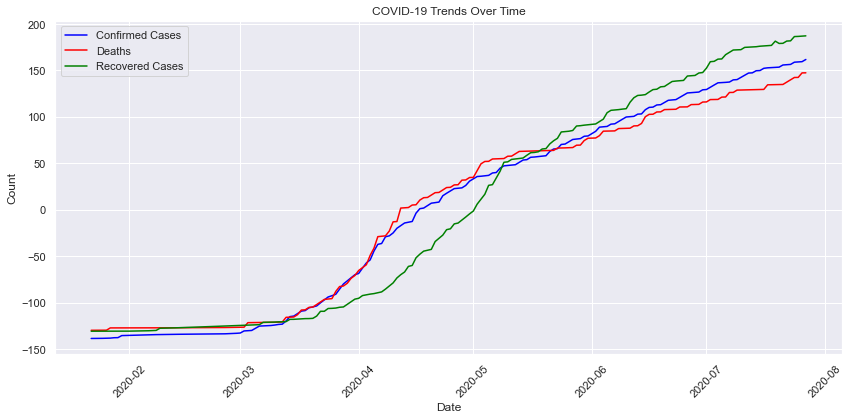

In [109]:
# Plotting the line plot for confirmed cases, deaths, and recoveries over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_trends, x='Date', y='Confirmed', label='Confirmed Cases', color='blue')
sns.lineplot(data=daily_trends, x='Date', y='Deaths', label='Deaths', color='red')
sns.lineplot(data=daily_trends, x='Date', y='Recovered', label='Recovered Cases', color='green')

plt.title('COVID-19 Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# Calculate the Mortality Ratio (Death rate / Confirmed cases rate) for each day
daily_trends['Mortality Ratio'] = (daily_trends['Deaths'] / daily_trends['Confirmed']) * 100
daily_trends['Mortality Ratio']

0      93.650542
1      93.658959
2      93.672554
3      93.691138
4      93.734366
         ...    
183    89.416633
184    89.640733
185    89.556022
186    92.416017
187    91.128553
Name: Mortality Ratio, Length: 188, dtype: float64

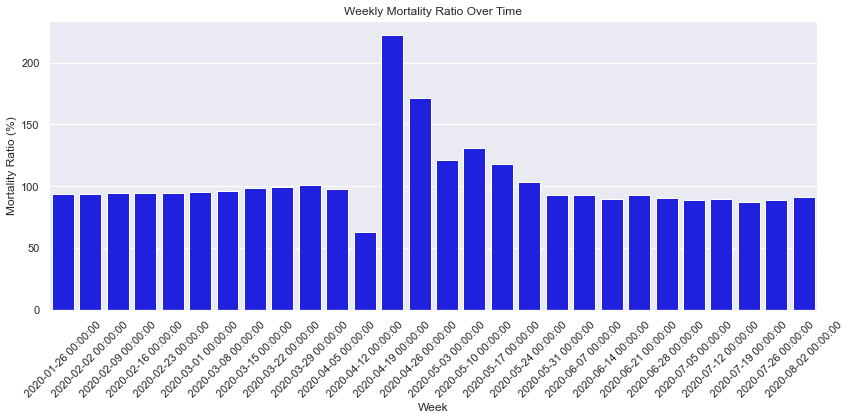

In [95]:
# Resample daily data into weekly averages
weekly_trends = daily_trends.set_index('Date').resample('W').mean()

# Plotting weekly mortality ratio trends
plt.figure(figsize=(12, 6))
sns.barplot(x=weekly_trends.index, y=weekly_trends['Mortality Ratio'], color='blue')

plt.title('Weekly Mortality Ratio Over Time')
plt.xlabel('Week')
plt.ylabel('Mortality Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


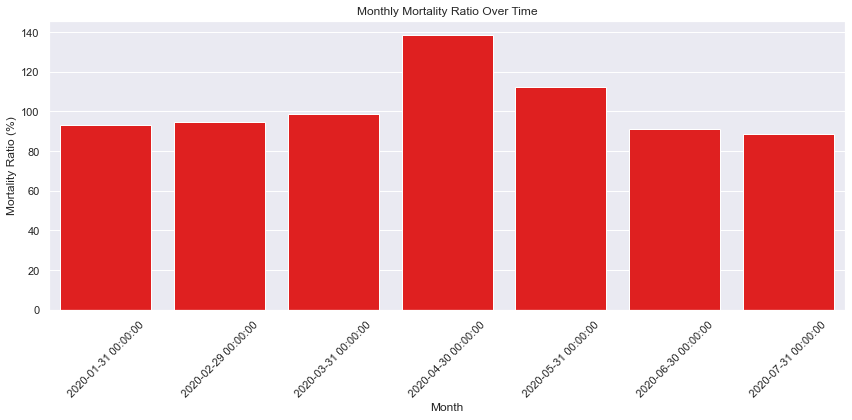

In [96]:
monthly_trends = daily_trends.set_index('Date').resample('M').mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends['Mortality Ratio'], color='red')

plt.title('Monthly Mortality Ratio Over Time')
plt.xlabel('Month')
plt.ylabel('Mortality Ratio (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

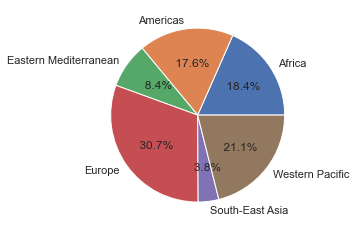

In [167]:
pp=covid.groupby('WHO Region')['Deaths'].count()
plt.pie(pp,labels=pp.index,autopct='%5.1f%%')
plt.show()

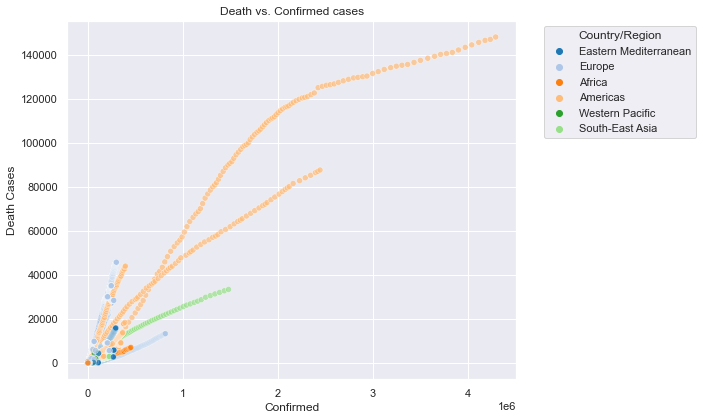

In [170]:
# Plotting the Total cases vs. population for each WHO Region
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Confirmed', y='Deaths', data=covid, hue='WHO Region', palette='tab20', alpha=0.7)

plt.title('Death vs. Confirmed cases')
plt.xlabel('Confirmed')
plt.ylabel('Death Cases')
plt.legend(title='Country/Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

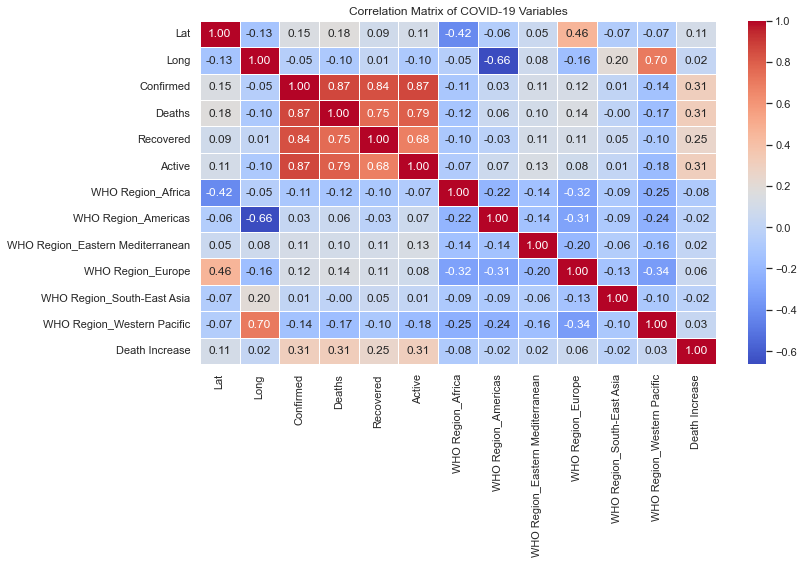

,Lat,Long,Confirmed,Deaths,Recovered,Active,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,Death Increase
Lat,1.000000,-0.126957,0.147428,0.175760,0.088606,0.106287,-0.420441,-0.062989,0.052660,0.459248,-0.066343,-0.065583,0.106946
Long,-0.126957,1.000000,-0.050977,-0.095706,0.013697,-0.095190,-0.052672,-0.663507,0.075465,-0.157260,0.198153,0.703052,0.022230
Confirmed,0.147428,-0.050977,1.000000,0.867901,0.842022,0.869453,-0.109384,0.027729,0.111122,0.119389,0.011675,-0.138163,0.309592
Deaths,0.175760,-0.095706,0.867901,1.000000,0.754595,0.794101,-0.122411,0.056974,0.097427,0.143836,-0.001883,-0.165038,0.312628
Recovered,0.088606,0.013697,0.842022,0.754595,1.000000,0.683127,-0.101603,-0.025484,0.105955,0.110254,0.047278,-0.098748,0.248744
Active,0.106287,-0.095190,0.869453,0.794101,0.683127,1.000000,-0.074957,0.069651,0.133740,0.078927,0.014468,-0.181014,0.307313
WHO Region_Africa,-0.420441,-0.052672,-0.109384,-0.122411,-0.101603,-0.074957,1.000000,-0.219579,-0.144027,-0.315600,-0.094753,-0.245289,-0.083987
WHO Region_Americas,-0.062989,-0.663507,0.027729,0.056974,-0.025484,0.069651,-0.219579,1.000000,-0.140337,-0.307514,-0.092326,-0.239005,-0.021042
WHO Region_Eastern Mediterranean,0.052660,0.075465,0.111122,0.097427,0.105955,0.133740,-0.144027,-0.140337,1.000000,-0.201706,-0.060559,-0.156769,0.015654
WHO Region_Europe,0.459248,-0.157260,0.119389,0.143836,0.110254,0.078927,-0.315600,-0.307514,-0.201706,1.000000,-0.132699,-0.343521,0.056867


In [171]:
# Calculate correlation matrix for numerical columns
numerical_columns = ['Lat', 'Long', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region_Africa', 'WHO Region_Americas',
       'WHO Region_Eastern Mediterranean', 'WHO Region_Europe',
       'WHO Region_South-East Asia', 'WHO Region_Western Pacific',
       'Death Increase']
correlation_matrix = cleaned_covid[numerical_columns].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix of COVID-19 Variables')
plt.tight_layout()
plt.show()

correlation_matrix

# Classification model

In [116]:
# Create a binary target variable for classification (1 if deaths increased, 0 if not
# To predict whether the number of death will increase compared to the previous day.
cleaned_covid['Death Increase'] = (cleaned_covid['Deaths'] > cleaned_covid['Deaths'].shift(1)).astype(int)
cleaned_covid['Death Increase']

0        0
1        0
2        0
3        0
4        0
        ..
49063    1
49064    1
49065    0
49066    1
49067    0
Name: Death Increase, Length: 49068, dtype: int32

In [117]:
cleaned_covid['Death Increase'].unique()

array([0, 1])

In [158]:
cleaned_covid

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region_Africa,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific,Death Increase
0,Afghanistan,0.494893,0.627207,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,0,0,1,0,0,0,0
1,Albania,0.792951,-0.047698,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,0,0,0,1,0,0,0
2,Algeria,0.250916,-0.310449,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,1,0,0,0,0,0,0
3,Andorra,0.848851,-0.312405,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,0,0,0,1,0,0,0
4,Angola,-1.370164,-0.080269,2020-01-22,-0.530696,-0.496877,-0.500483,-0.516603,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49063,Sao Tome and Principe,-0.899617,-0.240128,2020-07-27,-0.394624,-0.455798,-0.244285,-0.478529,1,0,0,0,0,0,1
49064,Yemen,-0.264750,0.354734,2020-07-27,-0.264687,2.097502,-0.209730,-0.394571,0,0,1,0,0,0,1
49065,Comoros,-1.388459,0.281154,2020-07-27,-0.475008,-0.476338,-0.385997,-0.510420,1,0,0,0,0,0,0
49066,Tajikistan,0.698244,0.677832,2020-07-27,2.125444,-0.320824,2.262446,-0.143347,0,0,0,1,0,0,1


In [118]:
cleaned_covid.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'WHO Region_Africa', 'WHO Region_Americas',
       'WHO Region_Eastern Mediterranean', 'WHO Region_Europe',
       'WHO Region_South-East Asia', 'WHO Region_Western Pacific',
       'Death Increase'],
      dtype='object')

In [150]:
# Drop rows with NaN in the target or features (especially for the first row)
cleaned_covid.dropna(subset=['Death Increase'], inplace=True)

# Features and target variable
features = ['Lat', 'Long','Confirmed', 'Recovered', 'Active', 'WHO Region_Africa', 'WHO Region_Americas',
       'WHO Region_Eastern Mediterranean', 'WHO Region_Europe',
       'WHO Region_South-East Asia', 'WHO Region_Western Pacific']

X = cleaned_covid[features]
y = cleaned_covid['Death Increase']

In [151]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but often beneficial for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [152]:
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [153]:
# Split the data into training and testing sets
X_train_1, X_test, y_train_1, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_1, y_train_1, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [154]:
# Create an XGBoost classifier and fit it to the training data
xgb_model  = xgb.XGBClassifier()
xgb_model .fit(X_train_scaled, y_train)

# Make predictions on the validation data
predictions = xgb_model.predict(X_valid_scaled)

In [155]:
 # Evaluate the model
accuracy = accuracy_score(y_valid, predictions)
print(f'Accuracy on validation set: {accuracy:.2f}')
print(classification_report(y_valid, predictions))

Accuracy on validation set: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5420
           1       0.97      0.96      0.97      2431

    accuracy                           0.98      7851
   macro avg       0.98      0.97      0.98      7851
weighted avg       0.98      0.98      0.98      7851



In [156]:
# Use the trained model to make predictions on the test data
X_test_scaled = scaler.transform(X_test)
predictions_test = xgb_model.predict(X_test_scaled)

In [157]:
# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, predictions_test)
print(f'Accuracy on test set: {accuracy_test:.2f}')
print(classification_report(y_test, predictions_test))

Accuracy on test set: 0.98
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6869
           1       0.97      0.96      0.96      2945

    accuracy                           0.98      9814
   macro avg       0.98      0.97      0.97      9814
weighted avg       0.98      0.98      0.98      9814



In [127]:
def plot_confusion_matrix(model, X_test, y_test, classes=None, normalize=False, title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Plotting confusion matrix.

    model: Trained classifier
    X_test: Test features
    y_test: True labels of the test set
    classes: List of class names (default None)
    normalize: Whether to normalize the confusion matrix (default False)
    title: Title of the plot (default 'Confusion matrix')
    cmap: Color map for the plot (default plt.cm.Blues)
    """

     # Generate predictions
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    if classes is None:
        classes = np.unique(y_test)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized ' + title.lower()

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


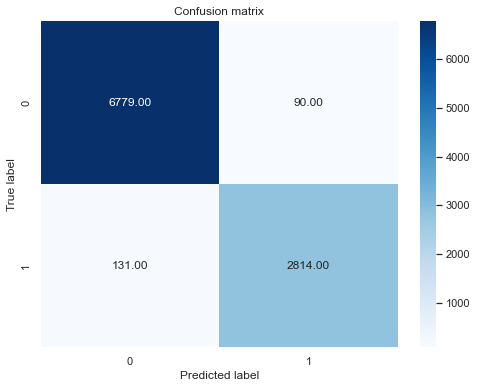

In [128]:
# Plot confusion matrix for test set
plot_confusion_matrix(xgb_model, X_test_scaled, y_test)

# Time series model

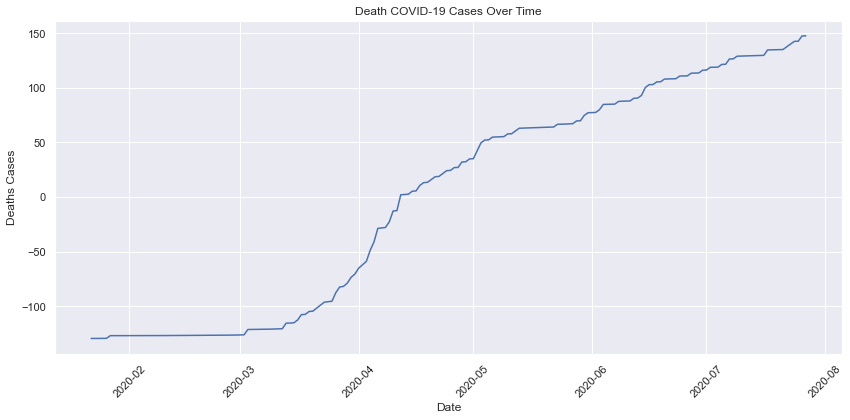

In [133]:
# Group data by Date and sum the values
daily_trends = cleaned_covid.groupby('Date').agg({'Deaths': 'sum'}).reset_index()

# Set the Date as the index for time series forecasting
daily_trends.set_index('Date', inplace=True)

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(daily_trends.index, daily_trends['Deaths'], label='Death Cases')
plt.title('Death COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

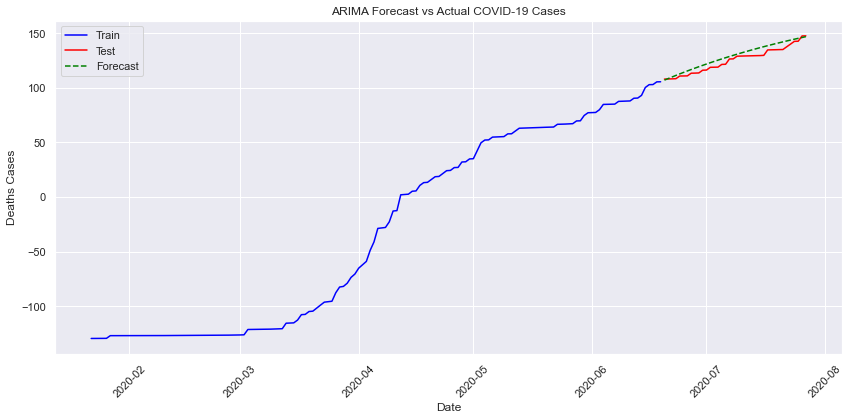

RMSE: 4.4975


In [141]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Split data into training and testing sets (80% training, 20% testing)
train_size = int(len(daily_trends) * 0.8)
train, test = daily_trends[:train_size], daily_trends[train_size:]

# Fit ARIMA model (order is p=1, d=1, q=1 for simplicity)
arima_model = ARIMA(train, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Make predictions
forecast = arima_fit.forecast(steps=len(test))
test['Forecast'] = forecast

# Plot the forecast vs actual
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Deaths'], label='Train', color='blue')
plt.plot(test.index, test['Deaths'], label='Test', color='red')
plt.plot(test.index, test['Forecast'], label='Forecast', color='green', linestyle='--')

plt.title('ARIMA Forecast vs Actual COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('Deaths Cases')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate RMSE (Root Mean Squared Error) for evaluation
rmse = np.sqrt(mean_squared_error(test['Deaths'], test['Forecast']))
print(f'RMSE: {rmse:.4f}')
